# Dataset yang digunakan di kelompok A Six [health insurance](https://www.kaggle.com/datasets/anmolkumar/health-insurance-cross-sell-prediction?select=train.csv)

## EXPLORATORY DATA ANALYSIS

Deskripsi Data<br>
- id: ID unik untuk pelanggan
- Gender: Jenis kelamin pelanggan
- Age: Usia pelanggan
- Driving_License 0 : Pelanggan tidak memiliki SIM, 1 : Pelanggan sudah memiliki SIM
- Region_Code: Kode unik untuk wilayah pelanggan
- Previously_Insured 1 : Pelanggan sudah memiliki Asuransi Kendaraan, 0 : Pelanggan belum memiliki Asuransi Kendaraan
- Vehicle_Age: Usia Kendaraan
- Vehicle_Damage 1 : Pelanggan sudah pernah mengalami kerusakan kendaraan. 0 : Pelanggan belum pernah mengalami kerusakan kendaraan.
- Annual_Premium: Jumlah premi yang harus dibayarkan pelanggan dalam setahun
- PolicySalesChannel: Kode anonim untuk saluran penghubung ke pelanggan, yaitu berbeda Agen, Melalui Surat, Melalui Telepon, Tatap Muka, dll.
- Vintage: Lamanya pelanggan sudah terkait dengan perusahaan (dalam hari)
- Response 1 : Pelanggan tertarik, 0 : Pelanggan tidak tertarik

In [1]:
#IMPORT LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
from matplotlib import rcParams

In [2]:
rcParams["figure.figsize"]= (10,7)
rcParams["lines.linewidth"]= 2.5
rcParams["xtick.labelsize"]= "x-large"
rcParams["ytick.labelsize"]= "x-large"

In [3]:
# import dataset
train = pd.read_csv("train.csv")
df = train.copy()

# 1. Descriptive Statistics

Gunakan function info dan describe pada dataset final project kalian. Tuliskan hasil observasinya, seperti:

A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai? <br>
B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja? <br>
C. Apakah ada kolom yang memiliki nilai summary agak aneh?
(min/mean/median/max/unique/top/freq)<br>
* Untuk masing-masing jenis observasi, tuliskan juga jika tidak ada masalah,
 misal untuk A: “Semua tipe data sudah sesuai

## Checking column, NULL VALUES, Unique and Dtypes

In [4]:
df.head() 

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


**Dari data diatas**
- **Semua tipe data sudah sesuai**
- **Tidak ada kolom yang memiliki nilai kosong (non-null count pada setiap kolom = 381109)**
- **tidak ada kolom yang memiliki nilai summary yang aneh. Semua nilai summary pada kolom numerik seperti Age, Region_Code, Annual_Premium, Policy_Sales_Channel, dan Vintage terlihat wajar dan sesuai dengan ekspektasi. Selain itu, kolom kategorikal seperti Gender, Driving_License, Previously_Insured, Vehicle_Age, dan Vehicle_Damage juga memiliki nilai summary yang konsisten dengan tipe datanya.**

In [6]:
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

**Tidak ada kolom yang memiliki nilai kosong pada dataset.**

In [7]:
# mencari jumlah unique value di tiap kolom
for i in df.columns:
    print(f" {i}: {df[i].nunique()}")

 id: 381109
 Gender: 2
 Age: 66
 Driving_License: 2
 Region_Code: 53
 Previously_Insured: 2
 Vehicle_Age: 3
 Vehicle_Damage: 2
 Annual_Premium: 48838
 Policy_Sales_Channel: 155
 Vintage: 290
 Response: 2


**Dari data diatas**
- **Kolom Age memiliki 66 unique value, yang menunjukkan variasi usia yang cukup luas pada dataset ini.**
- **Kolom Region_Code memiliki 53 unique value, yang menunjukkan variasi region yang cukup luas pada dataset ini.**
- **Kolom Policy_Sales_Channel memiliki 155 unique value, yang menunjukkan variasi channel penjualan asuransi kendaraan yang cukup luas pada dataset ini.**
- **Kolom Vintage memiliki 290 unique value, yang menunjukkan variasi lama menjadi pelanggan pada dataset ini.**

In [8]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


**Dari data diatas**
- **'Age' memiliki nilai mean 38.82 dan median 36. Hal ini menunjukkan bahwa distribusi umur memiliki sedikit positive skewed, di mana nilai mean lebih besar dari median.**
- **'Driving_License' memiliki nilai minimum 0 dan maksimum 1, yang menunjukkan bahwa fitur tersebut hanya memiliki 2 nilai unik. Sebanyak 99.79% nasabah memiliki surat izin mengemudi.**
- **'Region_Code' memiliki nilai mean 26.39 dan median 28, sehingga distribusi fitur tersebut cenderung skewness negatif.**
- **'Annual_Premium' memiliki nilai maksimum yang jauh lebih besar daripada nilai kuartil ketiga, yaitu sebesar 540165. Hal ini menunjukkan bahwa terdapat outlier pada fitur tersebut.**
- **'Policy_Sales_Channel' memiliki nilai median 133 dan nilai kuartil ketiga 152, sehingga distribusi fitur tersebut cenderung positive skewed.**
- **'Vintage' memiliki nilai mean 154.35 dan median 154, yang menunjukkan distribusi fitur tersebut cukup simetris.**
- **'Response' memiliki nilai mean 0.12 dan median 0, yang menunjukkan sekitar 12% nasabah memberikan respons positif terhadap asuransi yang ditawarkan.**

## Separate Columns

In [9]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

**Untuk melakukan eksplorasi data, beberapa fitur perlu diubah tipe datanya menjadi kategori atau string.**

In [22]:
df[["id",
    "Driving_License",
    "Region_Code",
    "Previously_Insured",
    "Policy_Sales_Channel",
    "Response"]] = df[["id",
                       "Driving_License",
                       "Region_Code",
                       "Previously_Insured",
                       "Policy_Sales_Channel",
                       "Response"]].astype(object)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  object 
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  object 
 4   Region_Code           381109 non-null  object 
 5   Previously_Insured    381109 non-null  object 
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  object 
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 34.9+ MB


In [23]:
numericals = ['Age','Annual_Premium','Vintage']
categoricals =['Gender',
               'Driving_License',
               'Region_Code',
               'Previously_Insured',
               'Vehicle_Age',
               'Vehicle_Damage',
               'Policy_Sales_Channel',
               'Response']

## Statistical Summary (Numeric)

In [13]:
df.describe() 

,Age,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000
mean,38.822584,30564.389581,154.347397
std,15.511611,17213.155057,83.671304
min,20.000000,2630.000000,10.000000
25%,25.000000,24405.000000,82.000000
50%,36.000000,31669.000000,154.000000
75%,49.000000,39400.000000,227.000000
max,85.000000,540165.000000,299.000000


**Dari hasil tersebut, dapat dilihat bahwa:**

- **Jumlah data pada setiap kolom sama, yaitu sebanyak 381109 data.**
- **Rata-rata usia pemegang polis adalah 38.8 tahun, rata-rata premi tahunan yang harus dibayarkan adalah 30564.4, dan rata-rata lama hubungan dengan perusahaan adalah 154.3 hari.**
- **Standar deviasi usia adalah 15.5 tahun, standar deviasi premi tahunan adalah 17213.2, dan standar deviasi lama hubungan dengan perusahaan adalah 83.7 hari.**
- **Usia minimum dari pemegang polis adalah 20 tahun, premi tahunan minimum yang harus dibayarkan adalah 2630, dan lama hubungan dengan perusahaan minimum adalah 10 hari.**
- **Quartil ke-1 dari usia pemegang polis adalah 25 tahun, quartil ke-1 dari premi tahunan yang harus dibayarkan adalah 24405, dan quartil ke-1 dari lama hubungan dengan perusahaan adalah 82 hari.**
- **Median usia pemegang polis adalah 36 tahun, median premi tahunan yang harus dibayarkan adalah 31669, dan median lama hubungan dengan perusahaan adalah 154 hari.**
- **Quartil ke-3 dari usia pemegang polis adalah 49 tahun, quartil ke-3 dari premi tahunan yang harus dibayarkan adalah 39400, dan quartil ke-3 dari lama hubungan dengan perusahaan adalah 227 hari.**
- **Usia maksimum dari pemegang polis adalah 85 tahun, premi tahunan maksimum yang harus dibayarkan adalah 540165, dan lama hubungan dengan perusahaan maksimum adalah 299 hari.**

**Berdasarkan insight di atas, beberapa pertanyaan yang dapat dibuat antara lain:**

1. **Apakah terdapat perbedaan premi asuransi yang signifikan antara kelompok usia tertentu?**
2. **Bagaimana distribusi usia dari pemegang polis asuransi kendaraan?**
3. **Apakah terdapat korelasi antara usia pemegang polis dengan lama keanggotaan dan/atau jumlah premi asuransi yang dibayarkan?**
4. **Apakah terdapat perbedaan lama keanggotaan pemegang polis asuransi kendaraan berdasarkan usia mereka?**
5. **Apakah ada pemegang polis yang membayar premi asuransi kendaraan di luar kisaran yang wajar? Jika iya, apa karakteristik pemegang polis tersebut?**

## Statistical Summary (Categoric)

In [14]:
df[categoricals].describe() 

,Gender,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Response
count,381109,381109,381109.0,381109,381109,381109,381109.0,381109
unique,2,2,53.0,2,3,2,155.0,2
top,Male,1,28.0,0,1-2 Year,Yes,152.0,0
freq,206089,380297,106415.0,206481,200316,192413,134784.0,334399


**Dari hasil di atas, kita dapat menemukan beberapa insight seperti:**

- **Gender: mayoritas pemegang polis adalah pria dengan jumlah 206.089, sedangkan wanita hanya 174.020.**
- **Driving License: hampir semua pemegang polis memiliki lisensi mengemudi dengan hanya sedikit pemegang polis yang tidak memiliki lisensi mengemudi.**
- **Region Code: terdapat 53 region code yang berbeda dengan region code 28 yang paling banyak digunakan oleh pemegang polis.**
- **Previously Insured: sebanyak 206.481 pemegang polis sebelumnya tidak memiliki asuransi kendaraan.**
- **Vehicle Age: mayoritas kendaraan yang diasuransikan adalah kendaraan berusia 1-2 tahun dengan jumlah 200.316.**
- **Vehicle Damage: mayoritas kendaraan yang diasuransikan mengalami kerusakan sebelumnya dengan jumlah 192.413.**
- **Policy Sales Channel: terdapat 155 channel penjualan yang digunakan dengan channel penjualan 152 paling banyak digunakan.**
- **Response: mayoritas pemegang polis tidak merespons kampanye pemasaran asuransi kendaraan dengan hanya sedikit yang merespons.**
- **Berdasarkan insight di atas, beberapa pertanyaan terkait dapat dibuat, antara lain:**

1. **Apakah jenis kelamin berpengaruh terhadap pembelian asuransi kendaraan?**
2. **Apakah region code memiliki pengaruh pada keputusan membeli asuransi kendaraan?**
3. **Apakah pemegang polis yang sebelumnya sudah memiliki asuransi kendaraan cenderung lebih tertarik membeli asuransi kendaraan lagi?**
4. **Apakah kendaraan yang lebih tua cenderung lebih sulit diasuransikan ataukah justru lebih mudah?**
5. **Apa saja keuntungan dan kerugian dari setiap channel penjualan yang digunakan?**
6. **Apa faktor-faktor yang mempengaruhi pemegang polis untuk merespons kampanye pemasaran asuransi kendaraan?**

## Value Counting (Categoricals)

In [15]:
cats = {cat: None for cat in categoricals}
cats.pop('Region_Code')
cats.pop('Policy_Sales_Channel')

for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()


Value count kolom Gender:
Male      206089
Female    175020
Name: Gender, dtype: int64

Value count kolom Driving_License:
1    380297
0       812
Name: Driving_License, dtype: int64

Value count kolom Previously_Insured:
0    206481
1    174628
Name: Previously_Insured, dtype: int64

Value count kolom Vehicle_Age:
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

Value count kolom Vehicle_Damage:
Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

Value count kolom Response:
0    334399
1     46710
Name: Response, dtype: int64



- **Terdapat lebih banyak pemegang polis pria (206.089) daripada wanita (175.020).**
- **Hampir semua pemegang polis (99,79%) memiliki Surat Izin Mengemudi (Driving License).**
- **Sebagian besar pemegang polis (54,14%) belum pernah diasuransikan sebelumnya (Previously Insured=0).**
- **Sebagian besar kendaraan yang diasuransikan berusia 1-2 tahun (52,53%), diikuti oleh kendaraan yang berusia kurang dari 1 tahun (43,20%) dan kendaraan yang berusia lebih dari 2 tahun (4,21%).**
- ***Sebagian besar kendaraan yang diasuransikan mengalami kerusakan (Vehicle Damage=Yes).**
- **Hanya sebagian kecil dari pemegang polis yang memberikan respons terhadap penawaran asuransi (Response=1), yaitu sekitar 12,24%.**

# Univariate Analysis

## Individual Boxplots (Numerical)

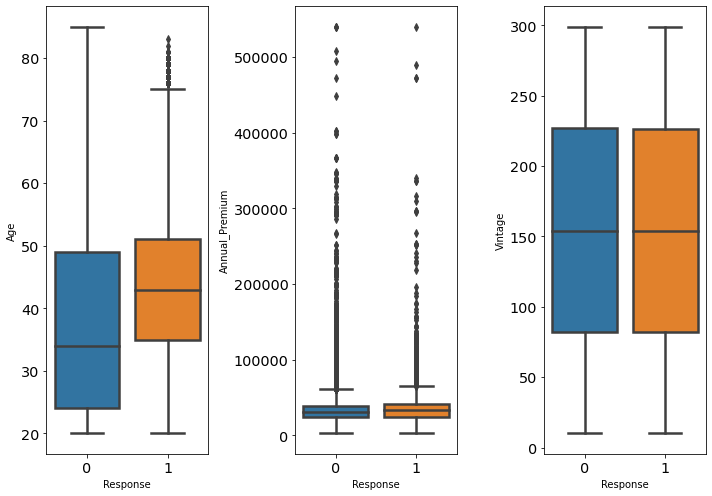

In [16]:
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]],x=df["Response"], orient="v")
    plt.tight_layout()

**Mencari nilai outlier pada fitur annual_premium dengan menggunakan metode yaitu interquartile range (IQR).**

In [17]:
#Metode IQR (Interquartile Range)
Q1 = np.percentile(df["Annual_Premium"], 25)
Q3 = np.percentile(df["Annual_Premium"], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
outliers = df[(df["Annual_Premium"] < lower_bound) | (df["Annual_Premium"] > upper_bound)]
outliers.shape
print("Terdapat outlier dengan jumlah", outliers.shape[0])

Terdapat outlier dengan jumlah 10320


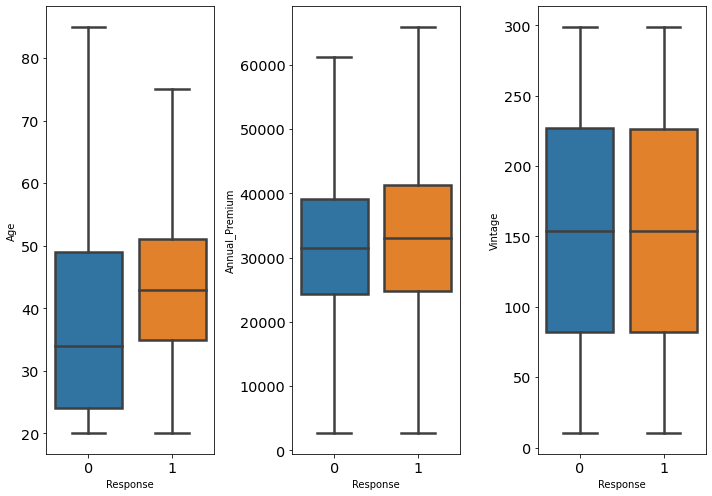

In [18]:
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]],x=df["Response"], orient="v", showfliers=False)
    plt.tight_layout()

- **calon nasabah yang merespons (Response=1) cenderung memiliki nilai rata-rata Age yang lebih tua dibandingkan dengan pelanggan yang tidak merespons (Response=0).**
- **calon nasabah yang merespons cenderung membayar Annual Premium yang lebih tinggi daripada pelanggan yang tidak merespons.**

## Individual Displot (Numerical)

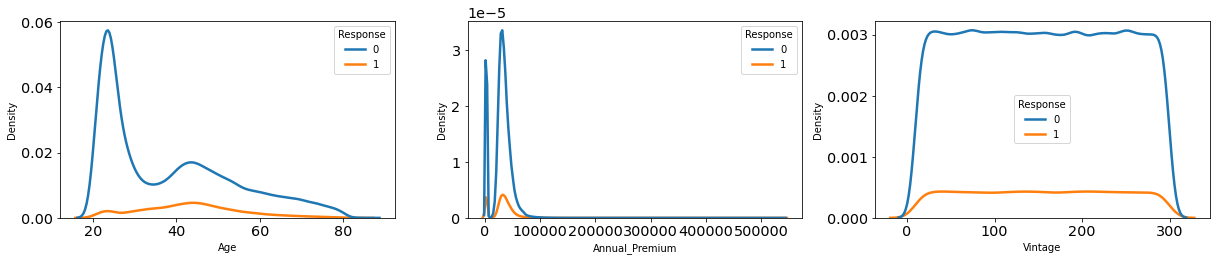

In [19]:
features = numericals
plt.figure(figsize=(17, 10))
for i in range(0, len(features)):
    plt.subplot(3,3,i+1,)
    sns.kdeplot(x=df[features[i]], hue=df["Response"])
    plt.xlabel(features[i])
    plt.tight_layout()

- **Distribusi variabel Age dan Annual_Premium terlihat condong ke kanan (skewed right), yang menunjukkan bahwa nilai-nilai tersebut cenderung terkonsentrasi di nilai-nilai rendah dan memiliki ekor yang panjang di sisi kanan.**
- **Variabel Vintage memiliki distribusi yang cukup simetris**

## Alternatif: Individual Violin Plots (Numerical)

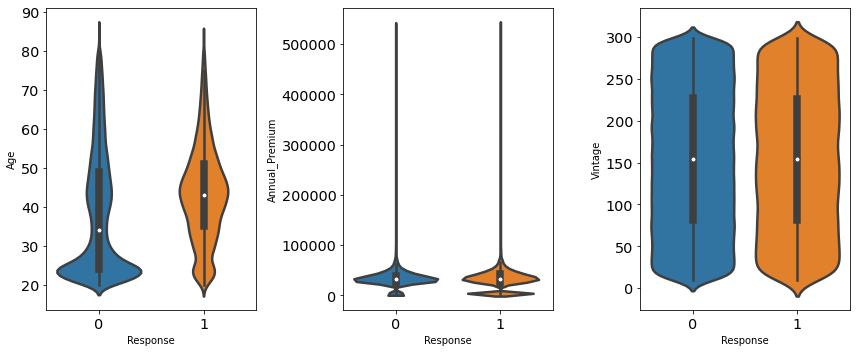

In [20]:
features = numericals
plt.figure(figsize=(12, 5))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.violinplot(y=df[features[i]], x=df["Response"])
    plt.tight_layout()


## Individual Countplot (Categorical)

IndexError: list index out of range

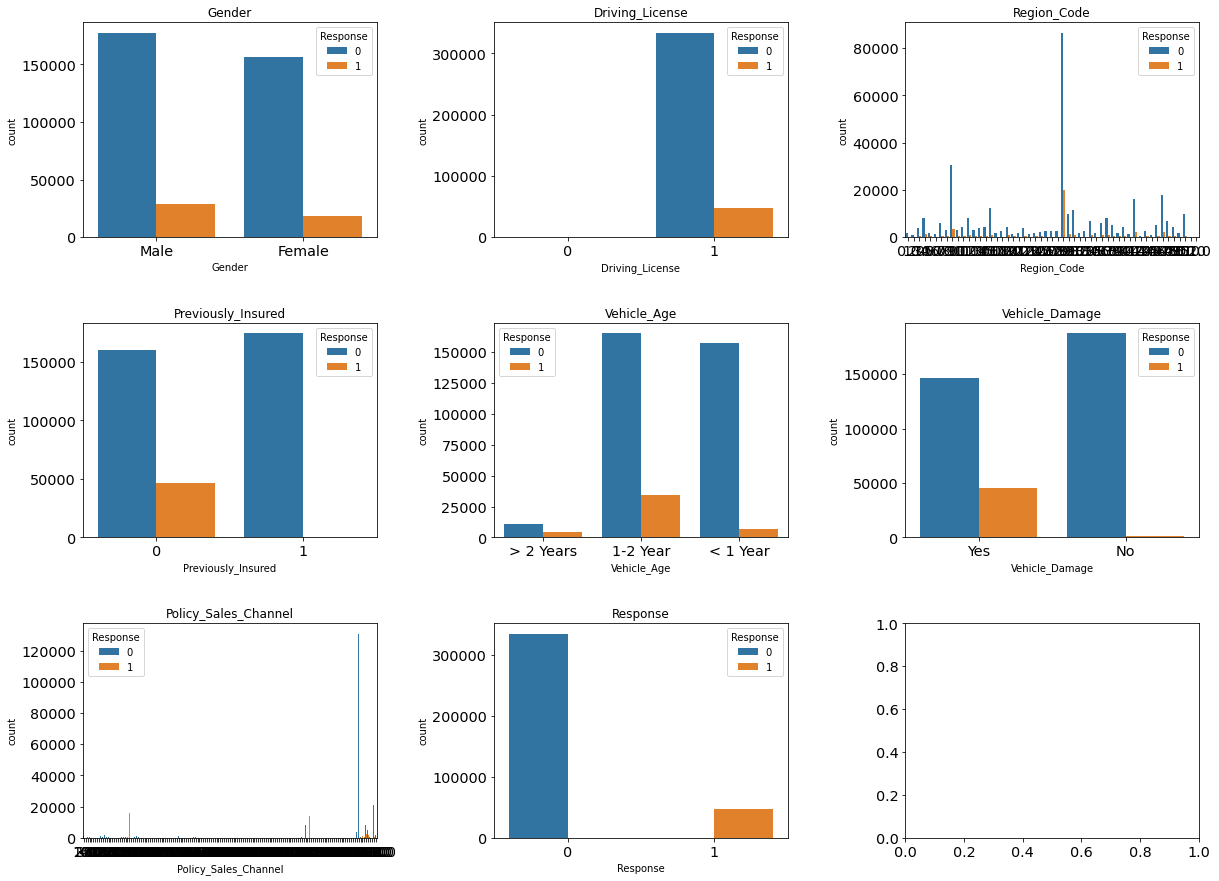

In [21]:
nrows = 3  # Jumlah baris
ncols = 3  # Jumlah kolom
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,15))
fig.subplots_adjust(wspace=0.4, hspace=0.4)
index = 0
for i in range(nrows):
    for j in range(ncols):
        sns.countplot(x=categoricals[index], hue='Response', data=df, ax=axes[i,j])
        axes[i,j].set_title(categoricals[index])
        index += 1
plt.tight_layout()
plt.show()


- **Gender: Terdapat lebih banyak pria yang tidak responsif terhadap penawaran asuransi dibandingkan wanita.**
- **Driving_License: Hampir semua pelanggan memiliki lisensi mengemudi dan hanya sedikit yang tidak responsif terhadap penawaran asuransi.**
- **Region_Code: Terdapat beberapa region_code yang lebih responsif terhadap penawaran asuransi dibandingkan region_code lain.**
- **Previously_Insured: Pelanggan yang sudah memiliki asuransi di tempat lain cenderung tidak responsif terhadap penawaran asuransi baru.**
- **Vehicle_Age: Kendaraan yang berusia 1-2 tahun lebih responsif terhadap penawaran asuransi dibandingkan kendaraan yang lebih tua atau lebih baru.**
- **Vehicle_Damage: Pelanggan yang kendaraannya rusak lebih responsif terhadap penawaran asuransi dibandingkan yang kendaraannya tidak rusak.**
- **Policy_Sales_Channel: Beberapa channel penjualan lebih efektif dalam menawarkan asuransi dibandingkan channel lainnya.**
- **Response: Jumlah pelanggan yang responsif terhadap penawaran asuransi jauh lebih sedikit dibandingkan yang tidak responsif.**

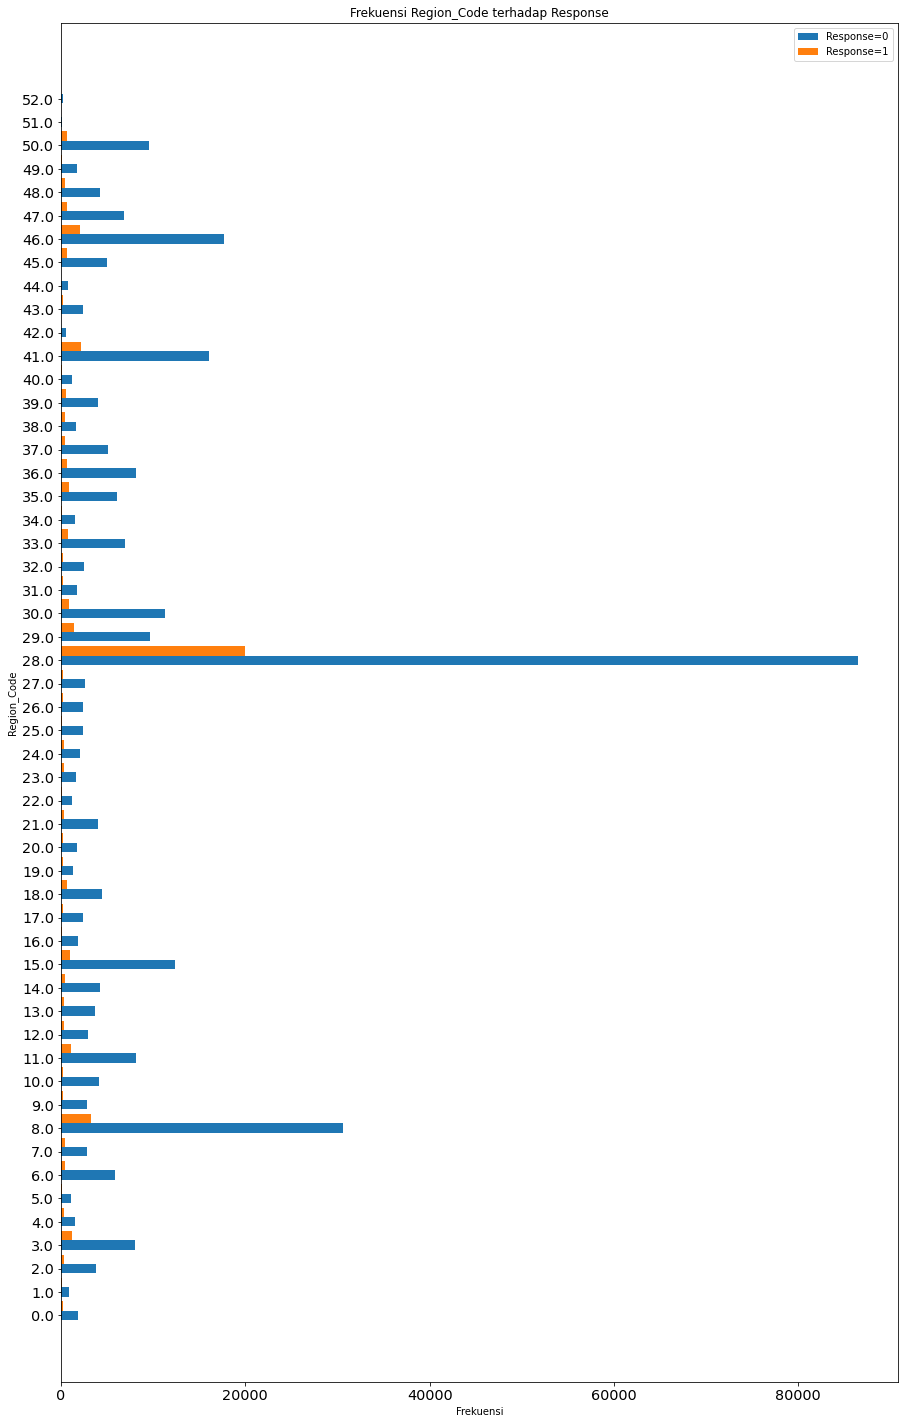

In [24]:
freqRegional_Code_0 = df[df['Response']==0]['Region_Code'].value_counts().sort_index()
freqRegional_Code_1 = df[df['Response']==1]['Region_Code'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(15,25))
width = 0.4

ax.barh(freqRegional_Code_0.index, freqRegional_Code_0.values, width, label='Response=0')
ax.barh(freqRegional_Code_1.index+width, freqRegional_Code_1.values, width, label='Response=1')

ax.set_ylabel('Region_Code')
ax.set_xlabel('Frekuensi')
ax.set_title('Frekuensi Region_Code terhadap Response')
ax.set_yticks(np.arange(len(freqRegional_Code_0.index)))
ax.set_yticklabels(freqRegional_Code_0.index)

ax.legend()
plt.show()


**Treemap dari jumlah nasabah yang memberikan respons positif terhadap asuransi kendaraan berdasarkan Region_Code.**

In [25]:
import squarify
df_1 = df[df['Response']==1]
rc = df_1.groupby(['Region_Code'])['id'].count().reset_index()
rc = rc.sort_values(by=['id'], ascending=False)
rc.columns = ['Region_Code', 'Frekuensi']
label = rc['Region_Code'].values.tolist()
sizes = rc['Frekuensi'].values.tolist()

plt.rcParams['figure.figsize'] = (30,20)
squarify.plot(sizes=sizes, label=label, alpha=0.6)
plt.axis('off')
plt.show()

ModuleNotFoundError: No module named 'squarify'

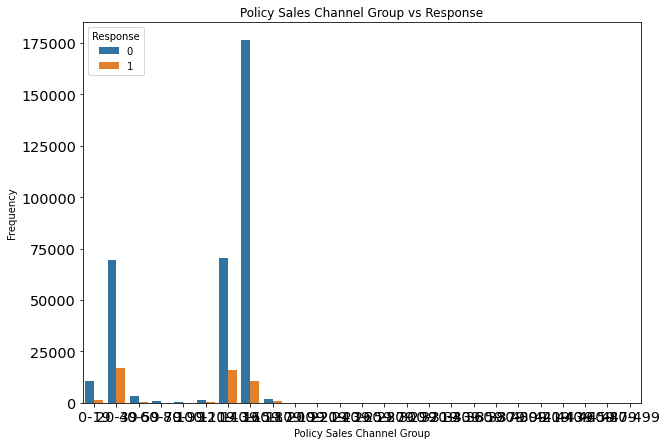

In [26]:
df['PSC_Group'] = pd.cut(df['Policy_Sales_Channel'], 
                          bins=[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500], 
                          include_lowest=True, 
                          labels=[f'{i}-{i+19}' for i in range(0, 500, 20)])


sns.countplot(x='PSC_Group', hue='Response', data=df)
plt.title('Policy Sales Channel Group vs Response')
plt.xlabel('Policy Sales Channel Group')
plt.ylabel('Frequency')
plt.show()


# Multivariate Analysis

## Correlation Heatmap (Numerical)

In [ ]:
df_new = train.copy()
df_new.info()

In [ ]:
df_new[['Age', 'Driving_License', 'Region_Code','Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']] = df_new[['Age', 'Driving_License', 'Region_Code','Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']].astype(int)

In [ ]:
dfcorr = df_new.drop('id', axis=1)
plt.figure(figsize=(17,10))
sns.set(font_scale=1.2)
sns.heatmap(dfcorr.corr(),cmap="crest",annot=True,annot_kws={"size": 18})
plt.xticks(rotation = 45)
plt.show()

- **Tidak ada variable yang memiliki korelasi kuat atau r >= 0.7 atau r <= -0.7**
- **Hanya variable Age dengan Policy_Sales_Channel yang memiliki korelasi yang cukup kuat**
- **Fitur Previously_Insured memiliki korelasi negatif yang cukup kuat dengan fitur Response (-0.34), yang mengindikasikan bahwa orang yang telah memiliki asuransi kendaraan di tempat lain memiliki kemungkinan yang lebih rendah untuk membeli asuransi kendaraan pada perusahaan ini.**
- **Fitur Age memiliki korelasi positif yang cukup kuat dengan fitur Response (0.11), yang mengindikasikan bahwa semakin tua usia seseorang, semakin besar kemungkinan mereka akan membeli asuransi kendaraan.**


## Stripplot Analysis (Categoricals-Numericals)

In [ ]:
fig = plt.figure(figsize=(30,10))

plt.subplot(1, 3, 1)
sns.stripplot(data=df, x="Vehicle_Damage", y="Age", hue='Response',dodge=True, palette='crest')

plt.subplot(1, 3, 2)
sns.stripplot(data=df, x="Vehicle_Damage", y="Annual_Premium", hue='Response',dodge=True, palette='crest')

plt.subplot(1, 3, 3)
sns.stripplot(data=df, x="Vehicle_Damage", y="Vintage", hue='Response',dodge=True, palette='crest')

- **Umur (Age) - Dari plot stripplot pertama, dapat dilihat bahwa pelanggan yang mempunyai kendaraan yang rusak (Yes) dan berusia lebih dari 50 tahun memiliki peluang lebih besar untuk membeli asuransi kendaraan dibandingkan dengan pelanggan yang berusia di bawah 50 tahun. Hal ini dapat menjadi informasi yang berguna dalam menentukan target pelanggan yang akan dipasarkan.**
- **terlihat bahwa pelanggan yang tidak memiliki Vehicle Damage cenderung lebih tidak responsif terhadap asuransi kendaraan daripada pelanggan yang memiliki Vehicle Damage**

In [ ]:
fig = plt.figure(figsize=(30,10))

plt.subplot(1, 3, 1)
sns.stripplot(data=df, x="Vehicle_Age", y="Age", hue='Response',dodge=True, palette='crest')

plt.subplot(1, 3, 2)
sns.stripplot(data=df, x="Vehicle_Age", y="Annual_Premium", hue='Response',dodge=True, palette='crest')

plt.subplot(1, 3, 3)
sns.stripplot(data=df, x="Vehicle_Age", y="Vintage", hue='Response',dodge=True, palette='crest')

**Grafik di atas menunjukkan beberapa hubungan antara variabel-variabel tertentu dengan Vehicle_Age, dengan hue Response. Distribusi variabel vintage tidak menunjukkan perbedaan yang signifikan dalam distribusinya, bahkan cenderung rapat. Pada hubungan Vehicle_Age dengan Age, hanya pada kelompok 1-2 tahun tidak terlihat perbedaan yang signifikan dalam distribusinya. Sedangkan pada hubungan Vehicle_Age dengan Annual_Premium, tidak terlihat perbedaan signifikan dalam distribusinya saat Annual_Premium berada di kisaran 2.630 hingga 90.000.**

In [ ]:
fig = plt.figure(figsize=(30,10))

plt.subplot(1, 3, 1)
sns.stripplot(data=df, x="Gender", y="Age", hue='Response',dodge=True, palette='crest')

plt.subplot(1, 3, 2)
sns.stripplot(data=df, x="Gender", y="Annual_Premium", hue='Response',dodge=True, palette='crest')

plt.subplot(1, 3, 3)
sns.stripplot(data=df, x="Gender", y="Vintage", hue='Response',dodge=True, palette='crest')

**Berdasarkan grafik di atas, terlihat bahwa tidak terdapat perbedaan distribusi yang signifikan pada variable Age dan vintage terhadap Gender dengan hue Response.**

# Business Insight

### Business Insight 1
**Insight**: Pelanggan dengan polis asuransi kendaraan yang lebih lama (Vehicle_Age > 2 tahun) cenderung lebih jarang merespon tawaran asuransi kendaraan baru dibandingkan pelanggan dengan polis kendaraan yang lebih baru. <br>
**Rekomendasi**: Perusahaan asuransi perlu melakukan kampanye pemasaran khusus untuk pelanggan dengan polis kendaraan yang lebih lama untuk mendorong mereka untuk mempertimbangkan untuk membeli polis asuransi kendaraan baru. Kampanye tersebut bisa dilakukan melalui media sosial, email marketing, atau telepon langsung.

### Business Insight 2
**Insight**: Pelanggan dengan kecelakaan kendaraan di masa lalu cenderung lebih memilih untuk membeli polis asuransi kendaraan yang lebih lengkap dengan manfaat tambahan seperti asuransi kesehatan dan asuransi kecelakaan diri. <br>
**Rekomendasi**: Perusahaan asuransi dapat menargetkan pelanggan yang pernah mengalami kecelakaan kendaraan dengan paket asuransi kendaraan yang lebih lengkap. Perusahaan dapat menambahkan manfaat tambahan seperti asuransi kesehatan dan asuransi kecelakaan diri pada paket ini untuk menarik minat pelanggan. Selain itu, perusahaan juga dapat mempertimbangkan untuk menawarkan diskon atau promosi khusus untuk pelanggan yang membeli paket asuransi kendaraan lengkap.

### Business Insight 3
**Insight**: Wilayah-wilayah dengan Region_Code 28.0, 41.0, 8.0, 46.0, dan 29.0 memiliki tingkat minat yang lebih tinggi dalam menggunakan asuransi kendaraan. <br>
**Rekomendasi**: Untuk meningkatkan kepercayaan dan minat masyarakat dalam menggunakan asuransi kendaraan di wilayah-wilayah tersebut, perusahaan dapat melakukan kampanye pemasaran yang lebih intensif dan menawarkan program-program khusus yang menarik bagi nasabah di wilayah tersebut. Selain itu, perusahaan juga perlu melakukan analisis lebih lanjut terkait faktor-faktor apa yang membuat nasabah di wilayah-wilayah tersebut lebih tertarik pada asuransi kendaraan. Analisis tersebut dapat digunakan sebagai dasar dalam pengembangan produk dan strategi pemasaran yang lebih efektif.

# GIT

GITnya capt atau perwakilan? tapi tunggu fix